# Project 1 B

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Part B Objective

Use Forward Finite Diffrence Approximation's to appoximate derivitives on a computer:

$$ d^+_{dp}f(a) = \frac{fl_{dp}(a + h) - fl_{dp}(a)}{h} $$

$$ d^+_{dp}f(a) \approx f'(x)$$

$$ d^+_{dp}f(a) = f'(x)$$

as ${n\to\infty} $, where $h = 2^{-n} $





Observe how the relitive error $ r = \frac{f'(a) - d^+_{dp}f(a)}{f'(a)} $ and its upper bound $ R = c_1h + c_2\frac{1}{h}$ change with h and n. noting that the smallest value a $fl_{dp}$ (double precision floating point) can hold is $2^{-52}$, represented as $ \epsilon_{dp} = 2^{52}$

where $ c_1 = \left| \, \frac{f''(a)}{2f'(a)} \, \right|, \, c_2 = \left| \, \frac{f(a)*\epsilon_{dp}}{f'(a)} \, \right| $

In [ ]:
# %load Makefile
# %load Makefile
#############################################################
######
# Makefile for project 1
# Laurence Brown
# SMU Mathematics
# Math 3316
# 9/14/2015
#############################################################
######
# compiler & flags
CXX = g++
CXXFLAGS = -O -std=c++0x
# makefile targets
#proj1_a.exe	:	proj1_a.cpp
#proj1_b.exe	:	proj1_b.cpp

all:
	$(CXX) $(CXXFLAGS) proj1_a.cpp -o proj1_a.exe
	$(CXX) $(CXXFLAGS) proj1_b.cpp -o proj1_b.exe

clean :
	rm -f *.exe *.txt
####### End of Makefile #######

In [46]:
%cat proj1_b.cpp

#include <vector>
#include <stdlib.h> /* abs */
#include <cmath> /* pow */
#include <algorithm>  /* reverse */
#include <iostream>
#include <string>
#include <fstream>

using namespace std;

//variables:
	//smallest machine number
const double error_dp = pow(2,-52);

//computer estimates for functions f(x) = x^-3, f'(x), f''(x). 
	//*used as actual values for error calculations
double f(double x)
	{	return pow(x,-3);			}

double df(double x)
	{	return -3 * pow(x,-4);		}

double ddf(double x)
	{	return 12 * pow(x,-5);		}

//computer estimates for functions f(x) = x^^-3, f'(x), f''(x). using
	//using the forward diffrence approximation method.
double df_fda(double x, double h)
	{	return (f(x + h) - f(x)) / h;	}

//computer estimates for relitive error, r ,  of df_fda(x)
double r(double x, double  h)
	{	return abs( (df(x) - df_fda(x, h)) / f(x) );	}

//c1 and c2 for next formula

double c1(double x)
	{	return abs( ddf(x) / (2.0 * df(x)) );	}

double c2(double x, double h)
{	return abs( ( 

In [25]:
n = loadtxt('n.txt')
h = loadtxt('h.txt')
r = loadtxt('r.txt')
R = loadtxt('R_ub.txt')

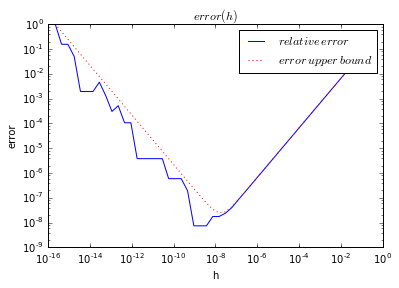

In [42]:
loglog(h,r, '-b')
loglog(h,R, ':r')
xlabel('h')
ylabel("error")
title('$error(h)$')
legend(('${relative \, error}$', '${error \, upper \, bound}$'))

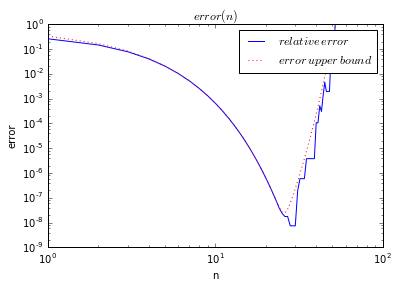

In [40]:
loglog(n,r,'-b')
loglog(n,R,':r')
xlabel('n')
ylabel("error")
title('$error(n)$')
legend(('${relative \, error}$', '${error \, upper \, bound}$'))

### List of Equations used:

$$ d^+_{dp}f(a) = \frac{fl_{dp}(a + h) - fl_{dp}(a)}{h} $$

$$ \epsilon_{dp} = 2^{52} , \, c_1 = \left| \, \frac{f''(a)}{2f'(a)} \, \right|, \, c_2 = \left| \, \frac{f(a)*\epsilon_{dp}}{f'(a)} \, \right| $$

$$ \\* $$

$$ h = 2^{-n} $$

$$ r = \frac{f'(a) - d^+_{dp}f(a)}{f'(a)} $$

$$ R = c_1h + c_2\frac{1}{h} , $$


# Part B Results

As expected as h decreases r and R decrease, and as n increases r and R decrease, but only up until a point. At very small values the error again begins to increase, this is most likley due to underflow rounding errors that occur in the machines operations and machine representation of real numbers.